In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
import re

In [2]:
# Locacating the chrome driver
driver = webdriver.Chrome(r'C:\Driver\chromedriver.exe')

C:\Users\HP\AppData\Local\Temp\ipykernel_10828\271880244.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Driver\chromedriver.exe')


In [ ]:
# not implimented just for reference
driver.get(url)
time.sleep(3)
soup = BeautifulSoup(driver.page_source,'html.parser')
print(soup.prettify())
driver.close()

In [3]:
# colleting the data using selinium 

brand = []
price = []
model = []
year = []
km_driven = []
owner_type = []
car_type = []
engine_type = []
insurence = []
loc = []
fuel_type = []

for ji in range(2,70):

    url = f'''https://autospoke.com/PreOwnedCars/Used-Cars-Mumbai-Autospoke-listing.asp?Makes=&Model
    Year=&Budget=&FuelType=&BodyType=&Transmission=&Milage=&Condition=&Keywords=&Insurance=&sorttype=ASC&NAV={ji}&sortid='''
    driver.get(url)
    time.sleep(3)   # it is the time to give the webpage to open
    soup = BeautifulSoup(driver.page_source,'html.parser')
    #print(soup.prettify())


    mod = soup.find_all('h3',class_ = 'property-title')
    for m in range(0,len(mod),2):
        brand.append(mod[m].text)

    for p in range(1,len(mod),2):
        price.append(mod[p].text.split(sep = ':')[1])

    bran = soup.find_all('div',class_ = 'media-right media-middle caption')
    for br in range(len(bran)): 
        model.append(bran[br].text.split(sep = ':')[0].split(sep = '\t')[4].split(sep = '\n')[0])

    for y in range(len(bran)):
        year.append(bran[y].text.split(sep = ':')[1].split(sep = '\n')[0])   

    for k in range(len(bran)):
        km_driven.append(bran[k].text.split(sep = ':')[2].split(sep = '|')[0])

    for o in range(len(bran)):
        owner_type.append(re.findall(r'Owner:(.*)\n\t',bran[o].text))

    for c in range(len(bran)):
        car_type.append(re.findall(r'\|(.*)\|',bran[c].text.split(sep = ':')[3])[0].strip())

    for m in range(len(bran)):
        engine_type.append(bran[m].text.split(sep = ':')[3].split(sep = '|')[2].split(sep = '\n')[0])


    for i in range(len(bran)):
        insurence.append(bran[i].text.split(sep = ':')[4].split(sep = '\n')[0].strip())


    for lc in range(len(bran)):
        loc.append(bran[lc].text.split(':')[5].split('\n')[0].strip())
        
    for fu in range(len(bran)):
        fuel_type.append(bran[fu].text.split('|')[1].split()[2])
    
    print(ji,len(brand))
driver.close()

2 10
3 20
4 30
5 40
6 50
7 60
8 70
9 80
10 90
11 100
12 110
13 120
14 130
15 140
16 150
17 160
18 170
19 180
20 190
21 200
22 210
23 220
24 230
25 240
26 250
27 260
28 270
29 280
30 290
31 300
32 310
33 320
34 330
35 340
36 350
37 360
38 370
39 380
40 390
41 400
42 410
43 420
44 430
45 440
46 450
47 460
48 470
49 480
50 490
51 500
52 510
53 520
54 530
55 540
56 550
57 560
58 570
59 580
60 590
61 600
62 610
63 620
64 630
65 640
66 650
67 660
68 670
69 680


In [7]:
# creating the data frame
autoscope_car= pd.DataFrame({'Brand':brand,
             'Model':model,
             'model_year':year,
             'km_driven':km_driven,
             'owner_type':owner_type,
             'car_type':car_type,
             'engine_type':engine_type,
             'insurence':insurence,
             'location':loc,
             'price':price,
             'fuel_type':fuel_type})

In [8]:
autoscope_car

,Brand,Model,model_year,km_driven,owner_type,car_type,engine_type,insurence,location,price,fuel_type
0,Maruti,CIAZ,2019,23135,[ -],SEDAN,Manual,Yes,Malad,"8,75,000",Petrol
1,Mahindra,Bolero,2012,75000,[ -],-,Manual,-,Borivali,"5,75,000",Diesel
2,Mahindra,TUV 300 T8,2018,13000,[ -],-,Manual,-,Borivali,"8,75,000",Diesel
3,BMW,525 i petrol,2010,46000,[ -],Sedan,Auto,-,Borivali,"5,75,000",Petrol
4,Honda,Brio V AT,2012,59000,[ -],-,Auto,-,Borivali,"3,99,000",Petrol
...,...,...,...,...,...,...,...,...,...,...,...
675,BMW,7 Series 730Ld,2013,68000,[ -],Sedan,Automatic,-,Borivali,"20,00,000",Diesel
676,Hyundai,i10,2019,25800,[ -],Sedan,Manual,-,Malad,"5,55,000",Petrol
677,Hyundai,Venue,2020,52000,[ 1],SUV/MUV,Manual,-,Borivali,"9,99,000",Diesel
678,Honda,City,2015,62000,[ 1],-,Automatic,-,Borivali,"6,51,000",Petrol


In [9]:
# storing the data in excel file
autoscope_car.to_excel(r'C:\Users\\Public\autoscope_car_data.xlsx')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel(r'C:\Users\\Public\autoscope_car_data.xlsx')

In [40]:
df

,Brand,Model,model_year,km_driven,car_type,engine_type,location,price,fuel_type,zscore,Location,brand_name
0,maruti,CIAZ,2019,23135.0,sedan,Manual,malad,875000.0,Petrol,-0.333772,malad,maruti
1,mahindra,Bolero,2012,75000.0,sedan,Manual,borivali,575000.0,Diesel,-0.501752,borivali,mahindra
2,mahindra,TUV 300 T8,2018,13000.0,sedan,Manual,borivali,875000.0,Diesel,-0.333772,borivali,mahindra
3,bmw,525 i petrol,2010,46000.0,sedan,Auto,borivali,575000.0,Petrol,-0.501752,borivali,bmw
4,honda,Brio V AT,2012,59000.0,sedan,Auto,borivali,399000.0,Petrol,-0.600300,borivali,honda
...,...,...,...,...,...,...,...,...,...,...,...,...
675,bmw,7 Series 730Ld,2013,68000.0,sedan,Automatic,borivali,2000000.0,Diesel,0.296154,borivali,bmw
676,hyundai,i10,2019,25800.0,sedan,Manual,malad,555000.0,Petrol,-0.512951,malad,hyundai
677,hyundai,Venue,2020,52000.0,suv/muv,Manual,borivali,999000.0,Diesel,-0.264340,borivali,hyundai
678,honda,City,2015,62000.0,sedan,Automatic,borivali,651000.0,Petrol,-0.459197,borivali,honda


### **identifying the correpted data**

In [5]:
df.dtypes

Unnamed: 0      int64
Brand          object
Model          object
model_year     object
km_driven      object
owner_type     object
car_type       object
engine_type    object
insurence      object
location       object
price          object
fuel_type      object
dtype: object

In [6]:
# coverting the correpted data
df.km_driven = pd.to_numeric(df.km_driven,errors='coerce')
df.price = df.price.str.replace(',','').astype(float)
df.engine_type = df.engine_type.str.strip()
df.car_type = df.car_type.replace('-',np.nan)
df.engine_type = df.engine_type.replace('-',np.nan)
df.location = df.location.replace('-',np.nan)
df.model_year = df.model_year.str.strip()
df.model_year = df.model_year.replace('-',np.nan)

In [10]:
# removing unvanted columns
df.drop(['Unnamed: 0','owner_type','insurence'],axis = 1,inplace = True)

In [13]:
# to count no of null values 
df.isna().sum()

Brand           0
Model           0
model_year      5
km_driven       9
car_type       41
engine_type    15
location       10
price           0
fuel_type       0
dtype: int64

In [14]:
# filling the null values 
df.model_year.fillna(df.model_year.mode()[0],inplace = True)
df.km_driven.fillna(df.groupby(['model_year'])['km_driven'].transform('median'),inplace = True)
df.location.fillna(df.location.mode()[0],inplace = True)
df.engine_type.fillna(df.engine_type.mode()[0],inplace = True)
df.car_type.fillna(df.car_type.mode()[0],inplace= True)

In [18]:
# changing the srting values to lower 
df.car_type = df.car_type.str.lower()
df.Brand = df.Brand.str.lower()
df.location = df.location.str.lower()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


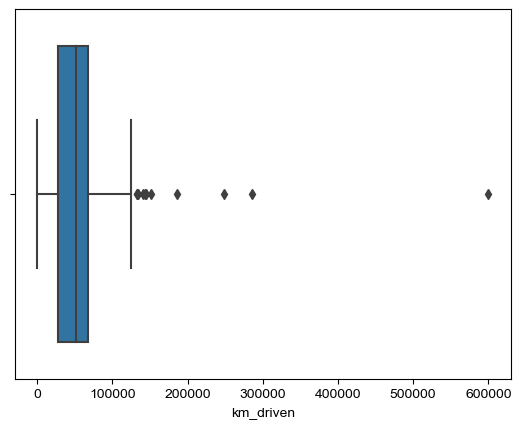

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# boxplot for finding the out layers 
sns.boxplot(df.km_driven)
# setting the style for matplotlib
plt.style.use('fivethirtyeight')

# choose seaborn style option
sns.set_style('darkgrid') 


### univarient analysis

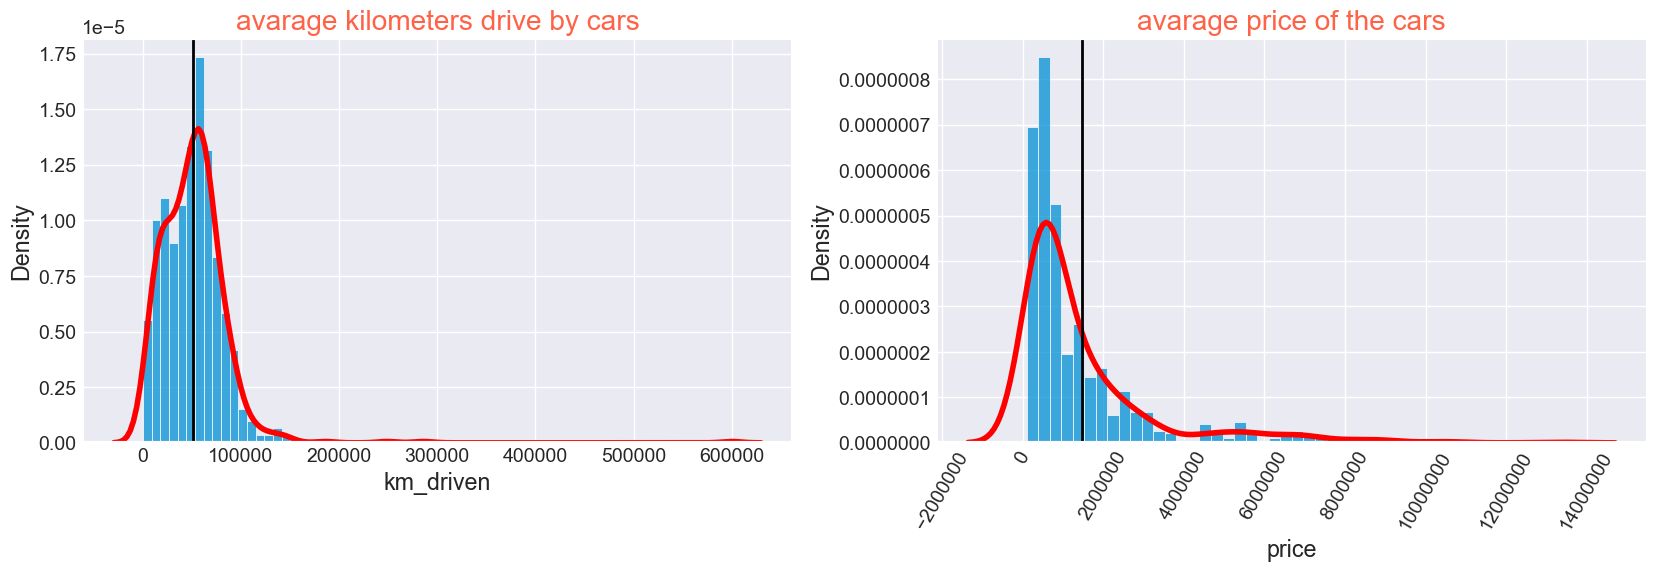

In [27]:
# kde and hist plots for single nuemeric columns price and kilometers
plt.figure(figsize= (18,5))

plt.subplot(121)
plt.title('avarage kilometers drive by cars',color = 'tomato')
sns.histplot(x = df.km_driven,stat = 'density')
sns.kdeplot(x = df.km_driven,color = 'r')
plt.axvline(df.km_driven.mean(),color = 'black',lw = 2)

plt.subplot(122)
plt.title('avarage price of the cars',color = 'tomato')
sns.histplot(x = df.price,stat = 'density')
sns.kdeplot(x = df.price,color = 'r')
plt.ticklabel_format(style='plain')
plt.xticks(rotation = 60)
plt.axvline(df.price.mean(),color = 'black',lw = 2)


### observations
* the 1st plot shows that most of the cars falls under the renge of 5 to 8 lakhs
* the 2nd plot  shows that most of the cars driven under the range of 50 thousand to 70 thousand


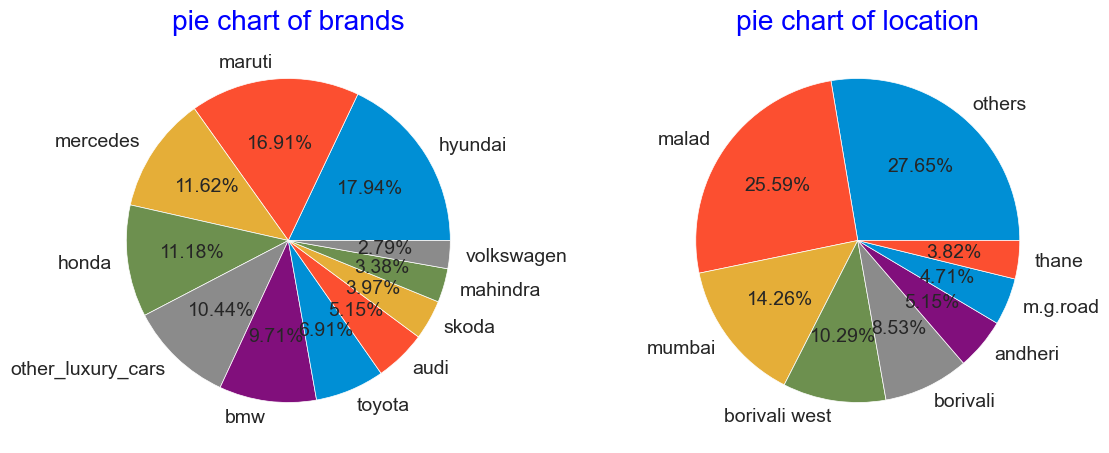

In [39]:
# pie plots on brnad and location to see the persentages
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('pie chart of brands',color = 'b')
plt.pie(df2.brand_name.value_counts().values,labels = df2.brand_name.value_counts().index,autopct = '%.2f%%');
plt.subplot(122)
plt.title('pie chart of location',color = 'b')
plt.pie(df2.Location.value_counts().values,labels = df2.Location.value_counts().index,autopct = '%.2f%%');

## observations
* first pie chart shows that hundai and maruthi cars are more in sales 
* second pie cahrt shows that malad and mumbai more cars in sales 

### bi_varient analysis

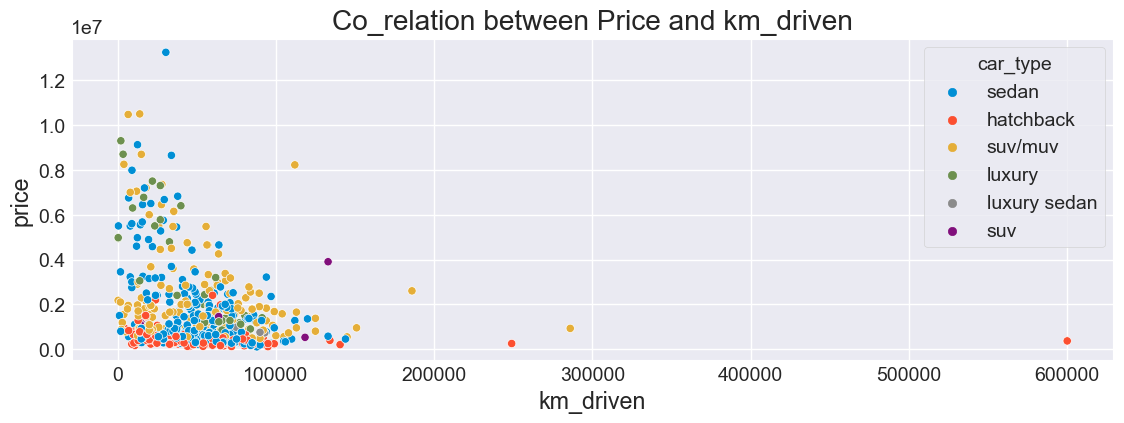

In [29]:
# scatter plot to see the relation btw to nuemeric operators price and kilometers 
plt.figure(figsize=(12,4))
plt.title('Co_relation between Price and km_driven')
sns.scatterplot(x = 'km_driven',y = 'price',data = df,hue ='car_type');

### observations
* the above fig shows that when the number of kilomrters driven by the car is decreases then the price of the car increases

In [30]:
df.Brand = df.Brand.str.strip()

In [31]:
# small function for reducing city names
def fn2(x):
    if x == 'malad' or x == 'mumbai'  or x == 'borivali west' or x == 'borivali' or x== 'andheri' or x == 'm.g.road' or x == 'thane':
        return x
    else:
        return 'others'
                       

    
                     
              


In [32]:
df['Location'] = df.location.apply(fn2)

In [33]:
# small function for reducing brand names
def fn3(x):
    if x == 'hyundai' or x == 'maruti' or x == 'mercedes' or x == 'honda' or x == 'bmw' or x== 'toyota' or x == 'audi' or x =='skoda' or x == 'mahindra' or x == 'volkswagen':               
        return x
    else:
        return 'other_luxury_cars'


In [34]:
df['brand_name'] = df.Brand.apply(fn3)

In [35]:
df

,Brand,Model,model_year,km_driven,car_type,engine_type,location,price,fuel_type,zscore,Location,brand_name
0,maruti,CIAZ,2019,23135.0,sedan,Manual,malad,875000.0,Petrol,-0.333772,malad,maruti
1,mahindra,Bolero,2012,75000.0,sedan,Manual,borivali,575000.0,Diesel,-0.501752,borivali,mahindra
2,mahindra,TUV 300 T8,2018,13000.0,sedan,Manual,borivali,875000.0,Diesel,-0.333772,borivali,mahindra
3,bmw,525 i petrol,2010,46000.0,sedan,Auto,borivali,575000.0,Petrol,-0.501752,borivali,bmw
4,honda,Brio V AT,2012,59000.0,sedan,Auto,borivali,399000.0,Petrol,-0.600300,borivali,honda
...,...,...,...,...,...,...,...,...,...,...,...,...
675,bmw,7 Series 730Ld,2013,68000.0,sedan,Automatic,borivali,2000000.0,Diesel,0.296154,borivali,bmw
676,hyundai,i10,2019,25800.0,sedan,Manual,malad,555000.0,Petrol,-0.512951,malad,hyundai
677,hyundai,Venue,2020,52000.0,suv/muv,Manual,borivali,999000.0,Diesel,-0.264340,borivali,hyundai
678,honda,City,2015,62000.0,sedan,Automatic,borivali,651000.0,Petrol,-0.459197,borivali,honda


In [36]:
df2 = df.copy()

In [37]:
i = df2.model_year.sort_values()

Text(0.5, 0, 'year')

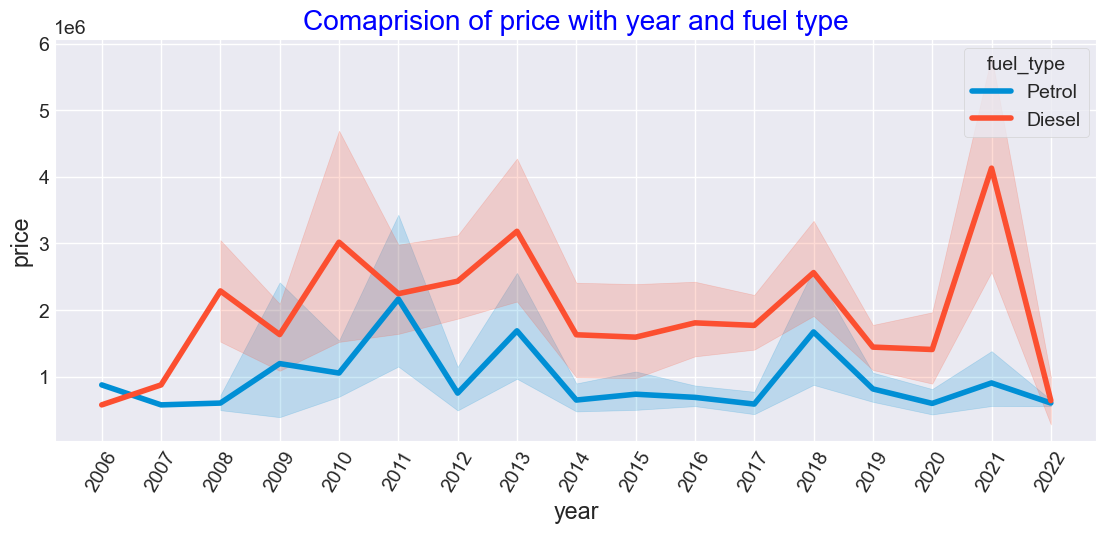

In [38]:
# lineplot for one date column and one nuemeric column 
plt.figure(figsize = (12,5))
sns.lineplot(x = i.values,y = df2.price,hue = df2.fuel_type);
plt.xticks(rotation = 60)
plt.title('Comaprision of price with year and fuel type',color = 'b')
plt.xlabel('year')

### observations
* the above graph clearly show that the new model vehicles are highly cost ,and diseal vehicles high cost compared to petrol vehicles

<AxesSubplot:xlabel='car_type'>

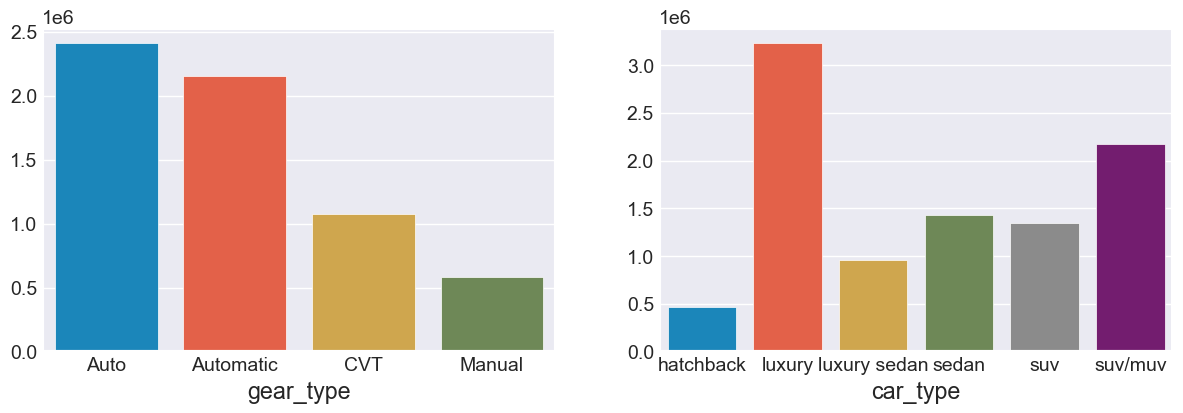

In [44]:
# barplot to see relation of geartype and cartype across the price
plt.figure(figsize=(13,4))

plt.subplot(121)
x = np.round(df2.groupby(['gear_type'])['price'].mean(),2)
sns.barplot(x = x.index,y = x.values)
#plt.ticklabel_format(style='plain')
plt.subplot(122)
y = np.round(df2.groupby(['car_type'])['price'].mean(),2)
#plt.xlabel('gear type')
sns.barplot(x = y.index,y = y.values)


### observations 
* in the 1st plot the average price of the Auto gear type cars is high and manual gear type is low
* in the 2nd plot the average price of the luxury and suv/muv car types are high and also hatchback is low

In [43]:
df2.rename(columns = {'engine_type':'gear_type'},inplace = True)

In [133]:
df2

,Brand,Model,model_year,km_driven,car_type,gear_type,location,price,fuel_type,zscore,Location,brand_name
0,maruti,CIAZ,2019,23135.0,sedan,Manual,malad,875000.0,Petrol,-0.333772,malad,maruti
1,mahindra,Bolero,2012,75000.0,sedan,Manual,borivali,575000.0,Diesel,-0.501752,borivali,mahindra
2,mahindra,TUV 300 T8,2018,13000.0,sedan,Manual,borivali,875000.0,Diesel,-0.333772,borivali,mahindra
3,bmw,525 i petrol,2010,46000.0,sedan,Auto,borivali,575000.0,Petrol,-0.501752,borivali,bmw
4,honda,Brio V AT,2012,59000.0,sedan,Auto,borivali,399000.0,Petrol,-0.600300,borivali,honda
...,...,...,...,...,...,...,...,...,...,...,...,...
675,bmw,7 Series 730Ld,2013,68000.0,sedan,Automatic,borivali,2000000.0,Diesel,0.296154,borivali,bmw
676,hyundai,i10,2019,25800.0,sedan,Manual,malad,555000.0,Petrol,-0.512951,malad,hyundai
677,hyundai,Venue,2020,52000.0,suv/muv,Manual,borivali,999000.0,Diesel,-0.264340,borivali,hyundai
678,honda,City,2015,62000.0,sedan,Automatic,borivali,651000.0,Petrol,-0.459197,borivali,honda


In [47]:
# to get the all cars information accorting customer intrusts
def car_fn():
    i = input('enter the brand: ')
    j = input('enter the gear type: ')
    k = int(input('enter the price: '))
    df2[(df2.Brand == i) & (df2.gear_type == j) & (df2.price<=k)]

enter the brandmaruti
enter the gear typeManual
enter the price1000000


,Brand,Model,model_year,km_driven,car_type,gear_type,location,price,fuel_type,zscore,Location,brand_name
0,maruti,CIAZ,2019,23135.0,sedan,Manual,malad,875000.0,Petrol,-0.333772,malad,maruti
6,maruti,CIAZ,2016,26195.0,sedan,Manual,thane,650000.0,Petrol,-0.459757,thane,maruti
21,maruti,Alto,2011,10921.0,hatchback,Manual,thane west,165000.0,Petrol,-0.731325,others,maruti
26,maruti,Suzuki Swift Dzire,2014,90000.0,sedan,Manual,borivali,475000.0,Diesel,-0.557745,borivali,maruti
33,maruti,Swift vxi,2008,60000.0,hatchback,Manual,mumbai,165000.0,Petrol,-0.731325,mumbai,maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
645,maruti,ALTO 800,2013,48000.0,hatchback,Manual,mira raod,199000.0,Petrol,-0.712287,others,maruti
657,maruti,CIAZ,2017,57421.0,sedan,Manual,thane,599000.0,Petrol,-0.488314,thane,maruti
659,maruti,Celerio,2018,79063.0,hatchback,Manual,thane,450000.0,Petrol,-0.571744,thane,maruti
668,maruti,SX4,2008,84100.0,sedan,Manual,ghatkopar,165000.0,Petrol,-0.731325,others,maruti


In [42]:
# removing the extra created columns which is creted for reducing the effect of outlayers and analysis purose 
df2.drop(['zscore','Location','brand_name'],axis = 1,inplace = True)

In [52]:
# saving the cleaned data in csv file  
df2.to_csv(r'C:\Users\\Public\autoscope_car_csv.csv')